In [0]:
# https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [0]:
from google.colab import drive
drive.mount('/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import cv2


In [0]:
loc = '/drive/My Drive/Colab Notebooks/PetImages/'
categories = ['Cat', 'Dog']

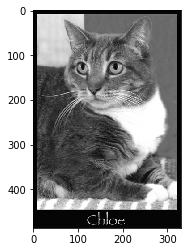

In [0]:
for category in categories: #iteration throth categories(Cat and Dog)
  path = os.path.join(loc, category)  # combining path ith category 
  for img in os.listdir(path): # geting images in each category
    image = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # reading image and change to gray scale
    plt.imshow(image, cmap='gray') # show image 
    break
  break

Since each image are of different size change the size to (200, 200)

(200, 200)


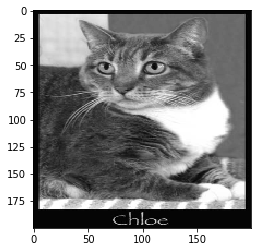

In [0]:
new_image = cv2.resize(image, (200, 200))
print(new_image.shape)
plt.imshow(new_image, cmap = 'gray')


Changing size and color of all the images.

In [0]:
training_data = []

def create_training_data():

  for category in categories: #iteration throth categories(Cat and Dog)
  
    path = os.path.join(loc, category)  # combining path ith category 
    class_num = categories.index(category)
    i=0
    for img in os.listdir(path): # geting images in each category
      
      try:
        image = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # reading image and change to gray scale
        new_image = cv2.resize(image, (200, 200))

        training_data.append([new_image, class_num])
        print(category, i)
        i+=1
      except Exception as e:
        pass
    
create_training_data()

In [0]:
len(training_data)

24964

Shuffle the data

In [0]:
import random

random.shuffle(training_data)

In [0]:
# 0: Image , 1: Labels
for i in training_data[:10]:
  print(i[1])

0
1
0
0
1
1
0
0
0
0


In [0]:
X = []
y = []

In [0]:
for features, label in training_data:
  X.append(features)
  y.append(label)


Changing the shape of X and converting to array

In [0]:
X = np.array(X).reshape(-1, 200, 200, 1)

In [0]:
import pickle

# X
pickle_out = open(loc+'X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

# Y
pickle_out = open(loc+'y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

Load the data from pickle model

In [0]:
import pickle

X = pickle.load(open(loc+'X.pickle', 'rb')) 
y = pickle.load(open(loc+'y.pickle', 'rb'))

Creating Neural Network Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


Normalizing X

In [0]:
X = X/255.0

In [0]:
Name = 'Cat-vs-Dog_Cnn{}'.format(int(time.time()))

Create Model

In [0]:
model = Sequential()

model.add(Conv2D(256, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir='log/{}'.format(Name))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 256)     2560      
_________________________________________________________________
activation_9 (Activation)    (None, 198, 198, 256)     0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 99, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 256)       590080    
_________________________________________________________________
activation_10 (Activation)   (None, 97, 97, 256)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 128)      

In [0]:
model.compile(optimizer='Adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [0]:
f = model.fit(X, y, batch_size= 42, validation_split=.2, epochs = 10, callbacks=[tensorboard])

Train on 19971 samples, validate on 4993 samples
Epoch 1/10
19971/19971 [==============================] - 303s 15ms/step - loss: 0.6824 - acc: 0.5560 - val_loss: 0.6378 - val_acc: 0.6365

Epoch 2/10
19971/19971 [==============================] - 302s 15ms/step - loss: 0.5719 - acc: 0.7026 - val_loss: 0.4880 - val_acc: 0.7585
Epoch 3/10
19971/19971 [==============================] - 303s 15ms/step - loss: 0.4564 - acc: 0.7843 - val_loss: 0.4219 - val_acc: 0.8051
Epoch 4/10
19971/19971 [==============================] - 302s 15ms/step - loss: 0.3761 - acc: 0.8310 - val_loss: 0.3845 - val_acc: 0.8258
Epoch 5/10
19971/19971 [==============================] - 302s 15ms/step - loss: 0.3138 - acc: 0.8637 - val_loss: 0.4176 - val_acc: 0.8232
Epoch 6/10
19971/19971 [==============================] - 303s 15ms/step - loss: 0.2583 - acc: 0.8912 - val_loss: 0.3783 - val_acc: 0.8474
Epoch 7/10
19971/19971 [==============================] - 303s 15ms/step - loss: 0.1947 - acc: 0.9212 - val_loss: 0.

In [0]:
len(X), len(y)

(24964, 24964)

Random Layers

In [0]:
dense = [0,1,2]
layer_size = [128, 256, 512]
conv_layer = [1,2,3]

In [0]:
for d in dense:
  for ls in layer_size:
    for cl in conv_layer:
      Name = '{}-conv-{}-Node-{}-dense-{}'.format(cl,ls, d, int(time.time()))
      print(Name)


1-conv-128-Node-0-dense-1572289624
2-conv-128-Node-0-dense-1572289624
3-conv-128-Node-0-dense-1572289624
1-conv-256-Node-0-dense-1572289624
2-conv-256-Node-0-dense-1572289624
3-conv-256-Node-0-dense-1572289624
1-conv-512-Node-0-dense-1572289624
2-conv-512-Node-0-dense-1572289624
3-conv-512-Node-0-dense-1572289624
1-conv-128-Node-1-dense-1572289624
2-conv-128-Node-1-dense-1572289624
3-conv-128-Node-1-dense-1572289624
1-conv-256-Node-1-dense-1572289624
2-conv-256-Node-1-dense-1572289624
3-conv-256-Node-1-dense-1572289624
1-conv-512-Node-1-dense-1572289624
2-conv-512-Node-1-dense-1572289624
3-conv-512-Node-1-dense-1572289624
1-conv-128-Node-2-dense-1572289624
2-conv-128-Node-2-dense-1572289624
3-conv-128-Node-2-dense-1572289624
1-conv-256-Node-2-dense-1572289624
2-conv-256-Node-2-dense-1572289624
3-conv-256-Node-2-dense-1572289624
1-conv-512-Node-2-dense-1572289624
2-conv-512-Node-2-dense-1572289624
3-conv-512-Node-2-dense-1572289624


In [0]:
for d in dense:
  for ls in layer_size:
    for cl in conv_layer:
      Name = '{}-conv-{}-Node-{}-dense-{}'.format(cl,ls, d, int(time.time()))
      print(Name)

      model1 = Sequential()

      model1.add(Conv2D(ls, (3,3), input_shape = X.shape[1:]))
      model1.add(Activation('relu'))
      model1.add(MaxPooling2D(pool_size=(2,2)))


      for i in range(cl-1):
        model1.add(Conv2D(ls, (3,3)))
        model1.add(Activation('relu'))
        model1.add(MaxPooling2D(pool_size=(2,2)))



      model1.add(Flatten())
      
      for _ in range(d):
        model1.add(Dense(ls))
        model1.add(Activation('relu'))



      model1.add(Dense(1))
      model1.add(Activation('sigmoid'))

      tensorboard = TensorBoard(log_dir='log/{}'.format(Name))

      model1.compile(optimizer='Adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

      f = model1.fit(X, y, batch_size= 42, validation_split=.2, epochs = 2, callbacks=[tensorboard])
      print(f)

In [0]:
model.save(loc+'/Catand_dog.model')

Predict

In [1]:
import tensorflow as tf
import cv2
from keras.models import load_model

Reading Images

In [0]:
def image(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img_arr = cv2.resize(img, 200, 200)
  return img_arr.shape(-1, 200, 200, 1)
  

Loading Model

In [0]:
m = load_model(loc+'/Catand_dog.model')

In [0]:
pred = m.predict([image('cat.jpg')])
print(pred)
print(categories(int(pred[0][0])))